## 프로그램 4-1

In [1]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit 함수로 Perceptron 학습
p=Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_)
print("훈련집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


## 프로그램 4-2

In [2]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit 데이터로 모델링

res=p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf = np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

[[74.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0. 71.  0.  1.  1.  0.  0.  0.  2.  1.]
 [ 0.  0. 57.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 69.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. 73.  0.  0.  2.  0.  1.]
 [ 0.  0.  0.  6.  0. 74.  0.  0.  4.  3.]
 [ 0.  0.  0.  0.  0.  0. 68.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. 72.  0.  0.]
 [ 0.  4.  1.  3.  0.  0.  0.  1. 54.  3.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  1. 65.]]
테스트 집합에 대한 정확률은  94.1585535465925 %입니다.


## 프로그램 4-3

In [3]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train, x_test,y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
  no_correct += conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은",accuracy*100,"%입니다.")

Iteration 1, loss = 2.67836338
Iteration 2, loss = 0.36611994
Iteration 3, loss = 0.22904201
Iteration 4, loss = 0.16903384
Iteration 5, loss = 0.13939671
Iteration 6, loss = 0.12380159
Iteration 7, loss = 0.10347594
Iteration 8, loss = 0.08927241
Iteration 9, loss = 0.07931753
Iteration 10, loss = 0.07408064
Iteration 11, loss = 0.06417802
Iteration 12, loss = 0.06041626
Iteration 13, loss = 0.05287654
Iteration 14, loss = 0.04922784
Iteration 15, loss = 0.04848040
Iteration 16, loss = 0.04163654
Iteration 17, loss = 0.03981027
Iteration 18, loss = 0.03769853
Iteration 19, loss = 0.03673709
Iteration 20, loss = 0.03319501
Iteration 21, loss = 0.03276407
Iteration 22, loss = 0.03067316
Iteration 23, loss = 0.02955343
Iteration 24, loss = 0.02756618
Iteration 25, loss = 0.02606796
Iteration 26, loss = 0.02625540
Iteration 27, loss = 0.02420818
Iteration 28, loss = 0.02309391
Iteration 29, loss = 0.02264257
Iteration 30, loss = 0.02119286
Iteration 31, loss = 0.02125446
Iteration 32, los

## 프로그램 4-4

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001,batch_size=512,max_iter=300,solver='adam',verbose=True)
mlp.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10),dtype=np.int16)
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100,"%입니다.")

Iteration 1, loss = 0.61463496
Iteration 2, loss = 0.27159111
Iteration 3, loss = 0.21751755
Iteration 4, loss = 0.18260255
Iteration 5, loss = 0.15573768
Iteration 6, loss = 0.13554610
Iteration 7, loss = 0.11944608
Iteration 8, loss = 0.10621055
Iteration 9, loss = 0.09574005
Iteration 10, loss = 0.08717076
Iteration 11, loss = 0.07906800
Iteration 12, loss = 0.07266975
Iteration 13, loss = 0.06632582
Iteration 14, loss = 0.06129815
Iteration 15, loss = 0.05620858
Iteration 16, loss = 0.05269518
Iteration 17, loss = 0.04841899
Iteration 18, loss = 0.04527787
Iteration 19, loss = 0.04182196
Iteration 20, loss = 0.03923059
Iteration 21, loss = 0.03604967
Iteration 22, loss = 0.03356163
Iteration 23, loss = 0.03076387
Iteration 24, loss = 0.02878379
Iteration 25, loss = 0.02705454
Iteration 26, loss = 0.02534963
Iteration 27, loss = 0.02352654
Iteration 28, loss = 0.02173879
Iteration 29, loss = 0.02077634
Iteration 30, loss = 0.01973860
Iteration 31, loss = 0.01767591
Iteration 32, los

## 프로그램 4-5

하이퍼 매개변수 최적화에 걸린 시간은 143.45839715003967 초입니다.


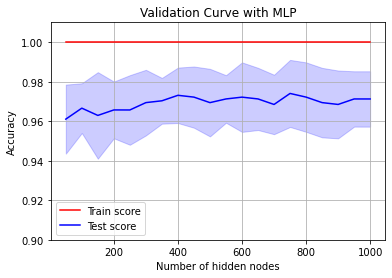


최적의 은닉층의 노드 개수는 750 개입니다.

[[71.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 73.  0.  0.  1.  0.  0.  0.  2.  0.]
 [ 0.  0. 75.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 63.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0. 73.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 67.  1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0. 74.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 68.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  0. 73.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 67.]]
테스트 집합에 대한 정확률은 97.91376912378304 %입니다.


In [5]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time()
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean= np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

#성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score", color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은",accuracy*100,"%입니다.")